In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import  pyplot as plt
import numpy as np

In [2]:
with pm.Model() as model:
    parameter = pm.Exponential("poisson_param", 1)
    data_generator = pm.Poisson("data_generator", parameter)

In [3]:
with model:
    data_plus_one = data_generator + 1

In [4]:
parameter.tag.test_value

array(0.6931471824645996)

In [5]:
parameter.tag.test_value, data_generator.tag.test_value, data_plus_one.tag.test_value

(array(0.6931471824645996), 0, array(1))

In [6]:
with pm.Model() as model:
    parameter = pm.Exponential("poisson_param", 1, testval=0.5)

parameter.tag.test_value

array(0.5)

In [7]:
with pm.Model() as model:
    lambda_1 = pm.Exponential("lambda_1", 1)
    lambda_2 = pm.Exponential("lambda_2", 1)
    tau = pm.DiscreteUniform("tau", lower=0, upper=10)

new_deterministic_variable = lambda_1 + lambda_2
new_deterministic_variable

Elemwise{add,no_inplace}.0

In [8]:
def subtract(x,y):
    return x - y

with model:
    stochastic_1 = pm.Uniform("U_1", 0, 1)
    stochastic_2 = pm.Uniform("U_2", 0, 1)

    det_1 = pm.Deterministic("Delta", subtract(stochastic_1, stochastic_2))
det_1

Delta

In [9]:
import theano.tensor as tt

with pm.Model() as theano_test:
    p1 = pm.Uniform("p", 0, 1)
    p2 = 1 - p1
    p = tt.stack([p1, p2])
    
    assignment = pm.Categorical("assignment", p)
assignment

assignment

(0, 8)

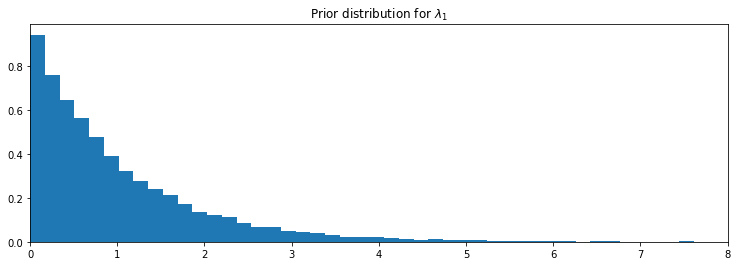

In [10]:
import scipy.stats as stats
figsize(12.5, 4)

samples = [lambda_1.random() for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\lambda_1$")
plt.xlim(0,8)

In [11]:
data = np.array([10, 5])
with model:
    fixed_variable = pm.Poisson("fxd", 1, observed=data)
fixed_variable.tag.test_value

array([10,  5])

In [12]:
tau = np.random.randint(0,80)
tau

47

In [13]:
alpha = 1./20.
lambda_1, lambda_2 = np.random.exponential(scale=1/alpha, size=2)
print(lambda_1, lambda_2)

41.4746915611 1.63474390761


In [14]:
data = np.r_[stats.poisson.rvs(mu=lambda_1, size=tau), stats.poisson.rvs(mu=lambda_2, size=80-tau)]
data

array([39, 44, 33, 54, 44, 37, 36, 42, 49, 39, 44, 49, 47, 45, 46, 38, 40,
       43, 40, 36, 42, 42, 38, 44, 36, 44, 40, 37, 47, 39, 47, 41, 36, 50,
       41, 28, 41, 42, 30, 41, 49, 39, 40, 45, 33, 48, 44,  4,  2,  2,  1,
        3,  0,  3,  0,  0,  4,  2,  2,  2,  1,  1,  2,  2,  6,  1,  0,  2,
        1,  1,  0,  2,  4,  2,  4,  3,  2,  1,  0,  2])

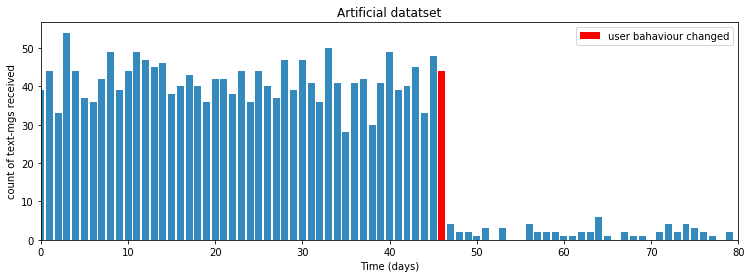

In [15]:
plt.bar(np.arange(80), data, color="#348ABD")
plt.bar(tau-1, data[tau-1], color="r", label="user bahaviour changed")
plt.xlabel("Time (days)")
plt.ylabel("count of text-mgs received")
plt.title("Artificial datatset")
plt.xlim(0, 80)
plt.legend()

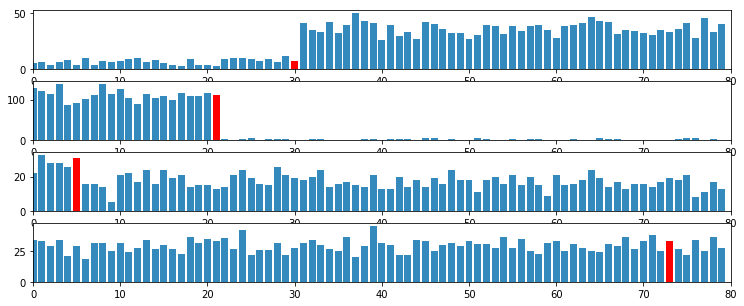

In [16]:
def plot_artificial_sms_dataset():
    tau = stats.randint.rvs(0, 80)
    alpha = 1./20.
    lambda_1, lambda_2 = stats.expon.rvs(scale=1/alpha, size=2)
    data = np.r_[stats.poisson.rvs(mu=lambda_1, size=tau), stats.poisson.rvs(mu=lambda_2, size=80 - tau)]
    plt.bar(np.arange(80), data, color="#348ABD")
    plt.bar(tau - 1, data[tau-1], color="r", label="user behaviour changed")
    plt.xlim(0, 80)

figsize(12.5, 5)
plt.title("More example of artificial datasets")
for i in range(4):
    plt.subplot(4, 1, i+1)
    plot_artificial_sms_dataset()

In [17]:
with pm.Model() as model:
    p = pm.Uniform('p', lower=0, upper=1)

In [18]:
p_true = 0.05
N = 1500

occurrences = stats.bernoulli.rvs(p_true, size=N)

print(occurrences)
print(np.sum(occurrences))

[0 0 0 ..., 0 0 0]
73


In [19]:
print("What is the observed frequency in Group A? %.4f" % np.mean(occurrences))
print("Does this equal the true frequency? %s" % (np.mean(occurrences) == p_true))

What is the observed frequency in Group A? 0.0487
Does this equal the true frequency? False


In [20]:
with model:
    obs = pm.Bernoulli("obs", p, observed=occurrences)
    step = pm.Metropolis()
    trace = pm.sample(18000, step=step)
    burned_trace = trace[1000:]

100%|██████████| 18500/18500 [00:02<00:00, 6990.52it/s]


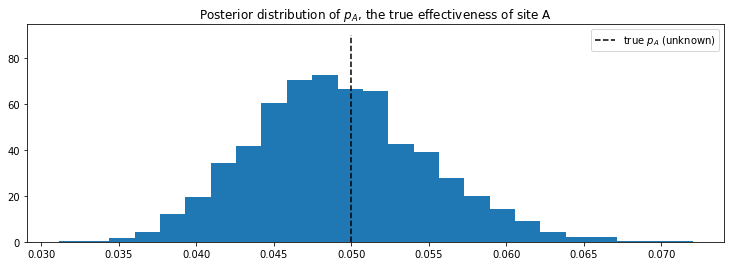

In [21]:
figsize(12.5, 4)
plt.title("Posterior distribution of $p_A$, the true effectiveness of site A")
plt.vlines(p_true, 0, 90, linestyle="--", label="true $p_A$ (unknown)")
plt.hist(burned_trace["p"], bins=25, histtype="stepfilled", normed=True)
plt.legend()

In [22]:
true_p_A = 0.05
true_p_B = 0.04

N_A = 1500
N_B = 750

observations_A = stats.bernoulli.rvs(true_p_A, size=N_A)
observations_B = stats.bernoulli.rvs(true_p_B, size=N_B)
print("Obs from Site A: ", observations_A[:30], "...")
print("Obs from Site B: ", observations_B[:30], "...")

Obs from Site A:  [0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...
Obs from Site B:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0] ...


In [23]:
print(np.mean(observations_A))
print(np.mean(observations_B))

0.054
0.0453333333333


In [24]:
with pm.Model() as model:
    p_A = pm.Uniform("p_A", 0, 1)
    p_B = pm.Uniform("p_B", 0, 1)
    
    delta = pm.Deterministic("delta", p_A - p_B)
    
    obs_A = pm.Bernoulli("obs_A", p_A, observed=observations_A)
    obs_B = pm.Bernoulli("obs_B", p_B, observed=observations_B)
    
    step = pm.Metropolis()
    trace = pm.sample(20000, step=step)
    burned_trace = trace[1000:]

100%|██████████| 20500/20500 [00:05<00:00, 3516.20it/s]


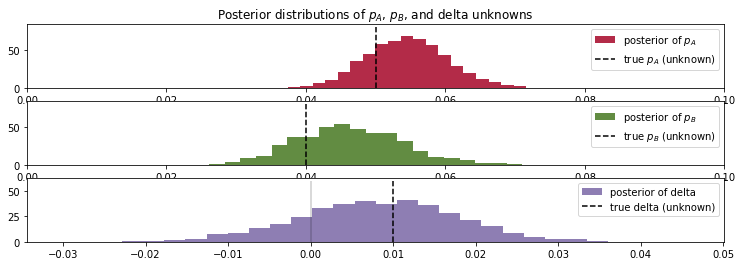

In [25]:
p_A_samples = burned_trace["p_A"]
p_B_samples = burned_trace["p_B"]
delta_samples = burned_trace["delta"]

ax = plt.subplot(311)
plt.xlim(0, .1)
plt.hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color="#A60628", normed=True)
plt.vlines(true_p_A, 0, 80, linestyle="--", label="true $p_A$ (unknown)")
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

ax = plt.subplot(312)

plt.xlim(0, .1)
plt.hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_B$", color="#467821", normed=True)
plt.vlines(true_p_B, 0, 80, linestyle="--", label="true $p_B$ (unknown)")
plt.legend(loc="upper right")

ax = plt.subplot(313)
plt.hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of delta", color="#7A68A6", normed=True)
plt.vlines(true_p_A - true_p_B, 0, 60, linestyle="--",
           label="true delta (unknown)")
plt.vlines(0, 0, 60, color="black", alpha=0.2)
plt.legend(loc="upper right");

In [26]:
print("Probability site A is WORSE than site B: %.3f" % \
    np.mean(delta_samples < 0))

print("Probability site A is BETTER than site B: %.3f" % \
    np.mean(delta_samples > 0))

Probability site A is WORSE than site B: 0.194
Probability site A is BETTER than site B: 0.806


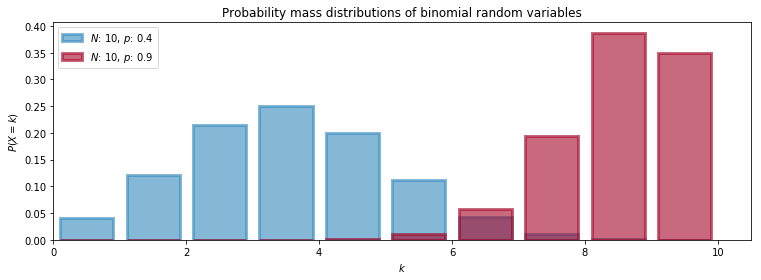

In [27]:
binomial = stats.binom

parameters = [(10, 0.4), (10, 0.9)]
colors = ["#348ABD", "#A60628"]

for i in range(2):
    N, p = parameters[i]
    _x = np.arange(N+1)
    plt.bar(_x -.5, binomial.pmf(_x, N, p), color=colors[i], edgecolor=colors[i], alpha=0.6, label="$N$: %d, $p$: %.1f" % (N, p), linewidth=3)
    
plt.legend(loc="upper left")
plt.xlim(0, 10.5)
plt.xlabel("$k$")
plt.ylabel("$P(X = k)$")
plt.title("Probability mass distributions of binomial random variables");

In [28]:
N = 100
with pm.Model() as model:
    p = pm.Uniform("freq_cheating", 0, 1)


In [29]:
with model:
    true_answers = pm.Bernoulli("truths", p, shape=N, testval=np.random.binomial(1, 0.5, N))

In [30]:
with model:
    first_coin_flips = pm.Bernoulli("first_flips", 0.5, shape=N, testval=np.random.binomial(1, 0.5, N))
print(first_coin_flips.tag.test_value)

[1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1
 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1]


In [31]:
with model:
    second_coin_flips = pm.Bernoulli("second_flips", 0.5, shape=N, testval=np.random.binomial(1, 0.5, N))

In [32]:
with model:
    val = first_coin_flips * true_answers + (1 - first_coin_flips)*second_coin_flips
    observed_proportion = pm.Deterministic("observed_proportion", tt.sum(val)/float(N))

In [33]:
observed_proportion.tag.test_value

array(0.5199999809265137)

In [35]:
X = 35

with model:
    observations = pm.Binomial("obs", N, observed_proportion, observed=X)

In [36]:
with model:
    step = pm.Metropolis(vars=[p])
    trace = pm.sample(40000, step=step)
    burned_trace = trace[15000:]

Assigned BinaryGibbsMetropolis to truths
Assigned BinaryGibbsMetropolis to first_flips
Assigned BinaryGibbsMetropolis to second_flips
100%|██████████| 40500/40500 [19:05<00:00, 35.35it/s]


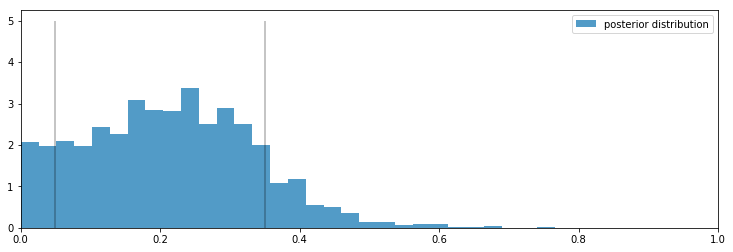

In [37]:
p_trace = burned_trace["freq_cheating"][15000:]
plt.hist(p_trace, histtype="stepfilled", normed=True, alpha=0.85, bins=30, label="posterior distribution", color="#348ABD")
plt.vlines([0.05, 0.35], [0,0], [5,5], alpha=0.3)
plt.xlim(0, 1)
plt.legend()

In [43]:
with pm.Model() as model:
    p = pm.Uniform("freq_cheating", 0, 1)
    p_skewed = pm.Deterministic("p_skewed", 0.5*p + 0.25)

In [44]:
with model:
    yes_response = pm.Binomial("number_cheaters", 100, p_skewed, observed=35)

In [45]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(25000, step=step)
    burned_trace = trace[2500:]

100%|██████████| 25500/25500 [00:03<00:00, 8041.23it/s]


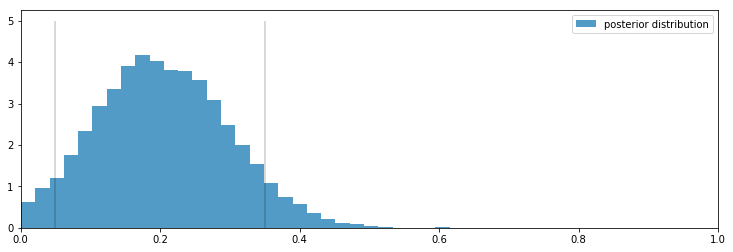

In [46]:
p_trace = burned_trace["freq_cheating"]
plt.hist(p_trace, histtype="stepfilled", normed=True, alpha=0.85, bins=30, 
         label="posterior distribution", color="#348ABD")
plt.vlines([.05, .35], [0, 0], [5, 5], alpha=0.2)
plt.xlim(0, 1)
plt.legend();